In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import os.path

F1:
[0.184971, 0.210826, 0.404092, 0.636364, 0.49211400000000005, 0.48731, 0.857143, nan, 0.326106, 0.644351, nan]


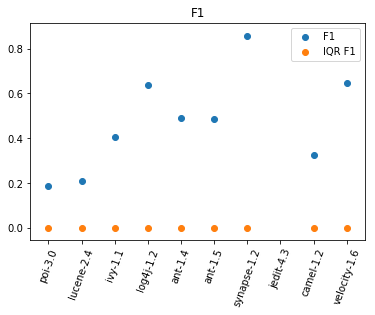

Recall:
[1.0, 1.0, 1.0, 1.0, 0.847826, 0.578313, 1.0, 0.0, 1.0, 1.0, 0.0]


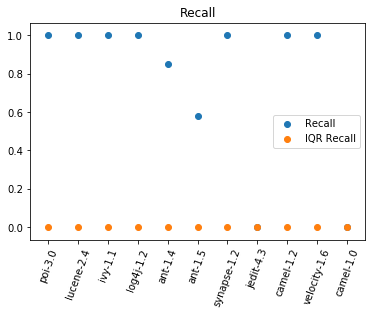

Precision:
[0.101911, 0.117834, 0.253205, 0.466667, 0.346667, 0.42105299999999996, 0.75, nan, 0.194819, 0.47530900000000004, nan]


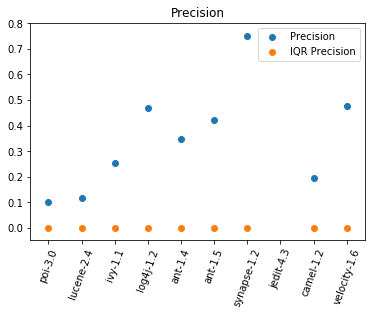

In [35]:
def createLists(filePaths, criteria):
    medianValues = []
    IQRLow = []
    IQRHigh = []
    names = []
    for file in filePaths:
        df = pd.read_csv(file)
        medianValues.append(df[criteria].median())
        IQRLow.append(df[criteria].quantile(0.25))
        IQRHigh.append(df[criteria].quantile(0.75))
        names.append(file.split("/")[1]) ## OUTPUT/NAME/*.csv
    IQR = list(map((lambda high, low: high - low), IQRHigh, IQRLow))
    return (medianValues, IQR, names)


def createGraph(fileNames, medianValues, IQR, criteria):
    xs = [x for x in range(len(fileNames))]
    print(criteria + ":")
    print(medianValues)
    plt.xticks(xs,fileNames, rotation=70)
    plt.scatter(xs, medianValues, label=criteria)
    plt.scatter(xs, IQR, label="IQR " + criteria)
    plt.legend()
    plt.title(criteria)
    plt.show()

def getFilePaths(folder):
    file_paths = []
    for root, directories, files in os.walk(folder):
        for filename in files:
            # Join the two strings in order to form the full filepath.
            filepath = os.path.join(root, filename)
            file_paths.append(filepath)  # Add it to the list.
    return file_paths  # Self-explanatory.
        
def graphCriteria(criteria):
    filePaths = getFilePaths("OUTPUT")
    medianValues,IQR,fileNames = createLists(filePaths,criteria)
    createGraph(fileNames,medianValues,IQR,criteria)
    
criterias = ["F1", "Recall", "Precision"]
for c in criterias:
    graphCriteria(c)

The data points are taken from Wei's data. Which show ant-1.5 tested against ant-1.7. etc. 

In [6]:
IQRValues

[-1, -1, -1]